# Sample Interview

### Import Libraries and File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_excel('data.xlsx')

### Preliminary EDA - Level 0 EDA - (No transformation yet)
For Actual Level 0 EDA work, refer to EDA Level 0 File.<br>
Below code is to retain a function used in Level 0 EDA

In [3]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
# summary_df = column_summary(df)
# display(summary_df)
# summary_df.to_csv('initial0_EDA_data.csv')

### Preliminary EDA - Level 1 EDA - (Some basic transformation on datatypes etc)
For Actual Level 1 EDA work, refer to EDA Level 1 File.<br>
Below code is for transformation after Level 1 EDA

In [4]:
### Rename the column names for familiarity
# This is if there is no requirement to use back the same column names.
# This is also only done if there is no pre-existing format, or if the col names don't follow conventional format.
# Normally will follow feature mart / dept format to name columns for easy understanding across board.
# Have also prepared an updated data dictionary within the powerpoint slides.
df_l1 = df.copy()
df_l1.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
new_col_dict = {'pc': 'c_pc', 'incm_typ': 'c_incm_typ', 'gn_occ': 'c_occ',
                 'num_prd': 'prod_nos', 'casatd_cnt': 'casa_td_nos', 'mthcasa': 'casa_bal_avg_mth',
                 'maxcasa': 'casa_bal_max_yr', 'mincasa': 'casa_bal_min_yr', 'drvcr': 'dr_cr_ratio_yr',
                 'mthtd': 'td_bal_avg', 'maxtd': 'td_bal_max', 'asset_value': 'asset_tot_val',
                 'hl_tag': 'loan_home_tag', 'al_tag': 'loan_auto_tag', 'pur_price_avg': 'prop_pur_price',
                 'ut_ave': 'ut_avg', 'maxut': 'ut_max', 'n_funds': 'funds_nos',
                 'cc_ave': 'cc_out_bal_avg_mth', 'max_mth_trn_amt': 'cc_txn_amt_max_mth', 'min_mth_trn_amt': 'cc_txn_amt_min_mth',
                 'avg_trn_amt': 'cc_txn_amt_avg_mth', 'ann_trn_amt': 'cc_txn_amt_yr', 'ann_n_trx': 'cc_txn_nos_yr'}
df_l1.rename(columns=new_col_dict, inplace=True)

In [5]:
### fill na's first before changing column type
fill_values = {'c_edu': 'Unknown', 'c_hse': 'UNKNOWN', 'c_pc': 0, 'c_incm_typ': 0,
               'c_occ': 'UNKNOWN',
               'casa_td_nos': 0, 'casa_bal_avg_mth': 0, 'casa_bal_max_yr': 0, 'casa_bal_min_yr': 0,
               'td_bal_avg': 0, 'td_bal_max': 0,
               'loan_home_tag':0, 'loan_auto_tag': 0,
               'ut_avg': 0, 'ut_max': 0, 'funds_nos': 0,
               'cc_txn_amt_max_mth': 0, 'cc_txn_amt_min_mth': 0, 'cc_txn_amt_avg_mth': 0,
               'cc_txn_amt_yr': 0, 'cc_txn_nos_yr': 0, 'cc_lmt': 0}
df_l1.fillna(fill_values, inplace=True)

df_l1['dr_cr_ratio_yr'] = df_l1['dr_cr_ratio_yr'].fillna(df_l1['c_seg'].map({'AFFLUENT': 9000, 'NORMAL': 2247}))
df_l1['prop_pur_price'] = df_l1['prop_pur_price'].fillna(df_l1['loan_home_tag'].map({1: 120999, 0: 0}))
df_l1['cc_out_bal_avg_mth'] = df_l1['cc_out_bal_avg_mth'].fillna(df_l1['cc_txn_amt_avg_mth'])

# df_l1.describe()

In [6]:
# Create a unique ID column (just in case required for future referencing)
df_l1['u_id'] = range(1,len(df_l1)+1)

In [7]:
# Mapping for c_edu / c_hse / c_occ / c_seg
c_edu_mapping = {'Unknown': 0, 'Others': 0, 'Below O-Levels':1,
                 'O-Levels': 2, 'A-Levels': 3, 'Technical/Vocational Qualifications': 4,
                 'Diploma': 5, 'Degree': 6, 'Professional Qualifications': 7, 'Masters': 8,
                 'PHD/Doctorate':9}
df_l1['c_edu_encoded'] = df_l1['c_edu'].map(c_edu_mapping)

c_hse_mapping = {'UNKNOWN': 0,
                 'INDUSTRIAL BUILDING': 1, 'COMMERICAL BUILDING': 1, 'OFFICE': 1,
                 'HOTEL/ SERVICE APARTMENT': 1, 'SHOPHOUSE':1,
                 'HDB 1-3 ROOM': 2, 'HDB 4-5 ROOM': 3, 'HDB EXECUTIVE APARTMENT/ MANSIONETTE': 4,
                 'PRIVATE CONDOMINIUM': 5, 'EXECUTIVE CONDOMINIUM': 5, 'PRIVATE APARTMENT': 5,
                 'TERRACE': 6, 'SEMI-DETACHED': 7, 'BUNGALOW': 8}
df_l1['c_hse_encoded'] = df_l1['c_hse'].map(c_hse_mapping)

c_occ_mapping = {'UNKNOWN': 0, 'OTHERS': 1,
                 'STUDENT': 2, 'HOUSEWIFE': 3, 'BLUE COLLAR': 4,
                 'WHITE COLLAR': 5, 'PMEB':6, 'RETIREE': 7}
df_l1['c_occ_encoded'] = df_l1['c_occ'].map(c_occ_mapping)

c_seg_mapping = {'AFFLUENT': 1, 'NORMAL': 0}
df_l1['c_seg_encoded'] = df_l1['c_seg'].map(c_seg_mapping)

In [8]:
# Change datatype
dtype_mapping = {'c_id': str, 'c_age': int, 'c_pc': int, 'c_incm_typ': int, 'prod_nos': int,
                 'casa_td_nos': int, 'loan_home_tag': int, 'loan_auto_tag': int,
                 'funds_nos': int, 'cc_txn_nos_yr': int, 'u_id': int,
                 'c_edu_encoded': int, 'c_hse_encoded': int, 'c_occ_encoded': int, 'c_seg_encoded': int}

df_l1 = df_l1.astype(dtype_mapping)
# summary_df = column_summary(df_l1)
# display(summary_df)

### Preliminary EDA - Level 2 EDA - (Further Understanding / Modification of Features)

In [9]:
df_l2 = df_l1.copy()

#### Correlation Analysis

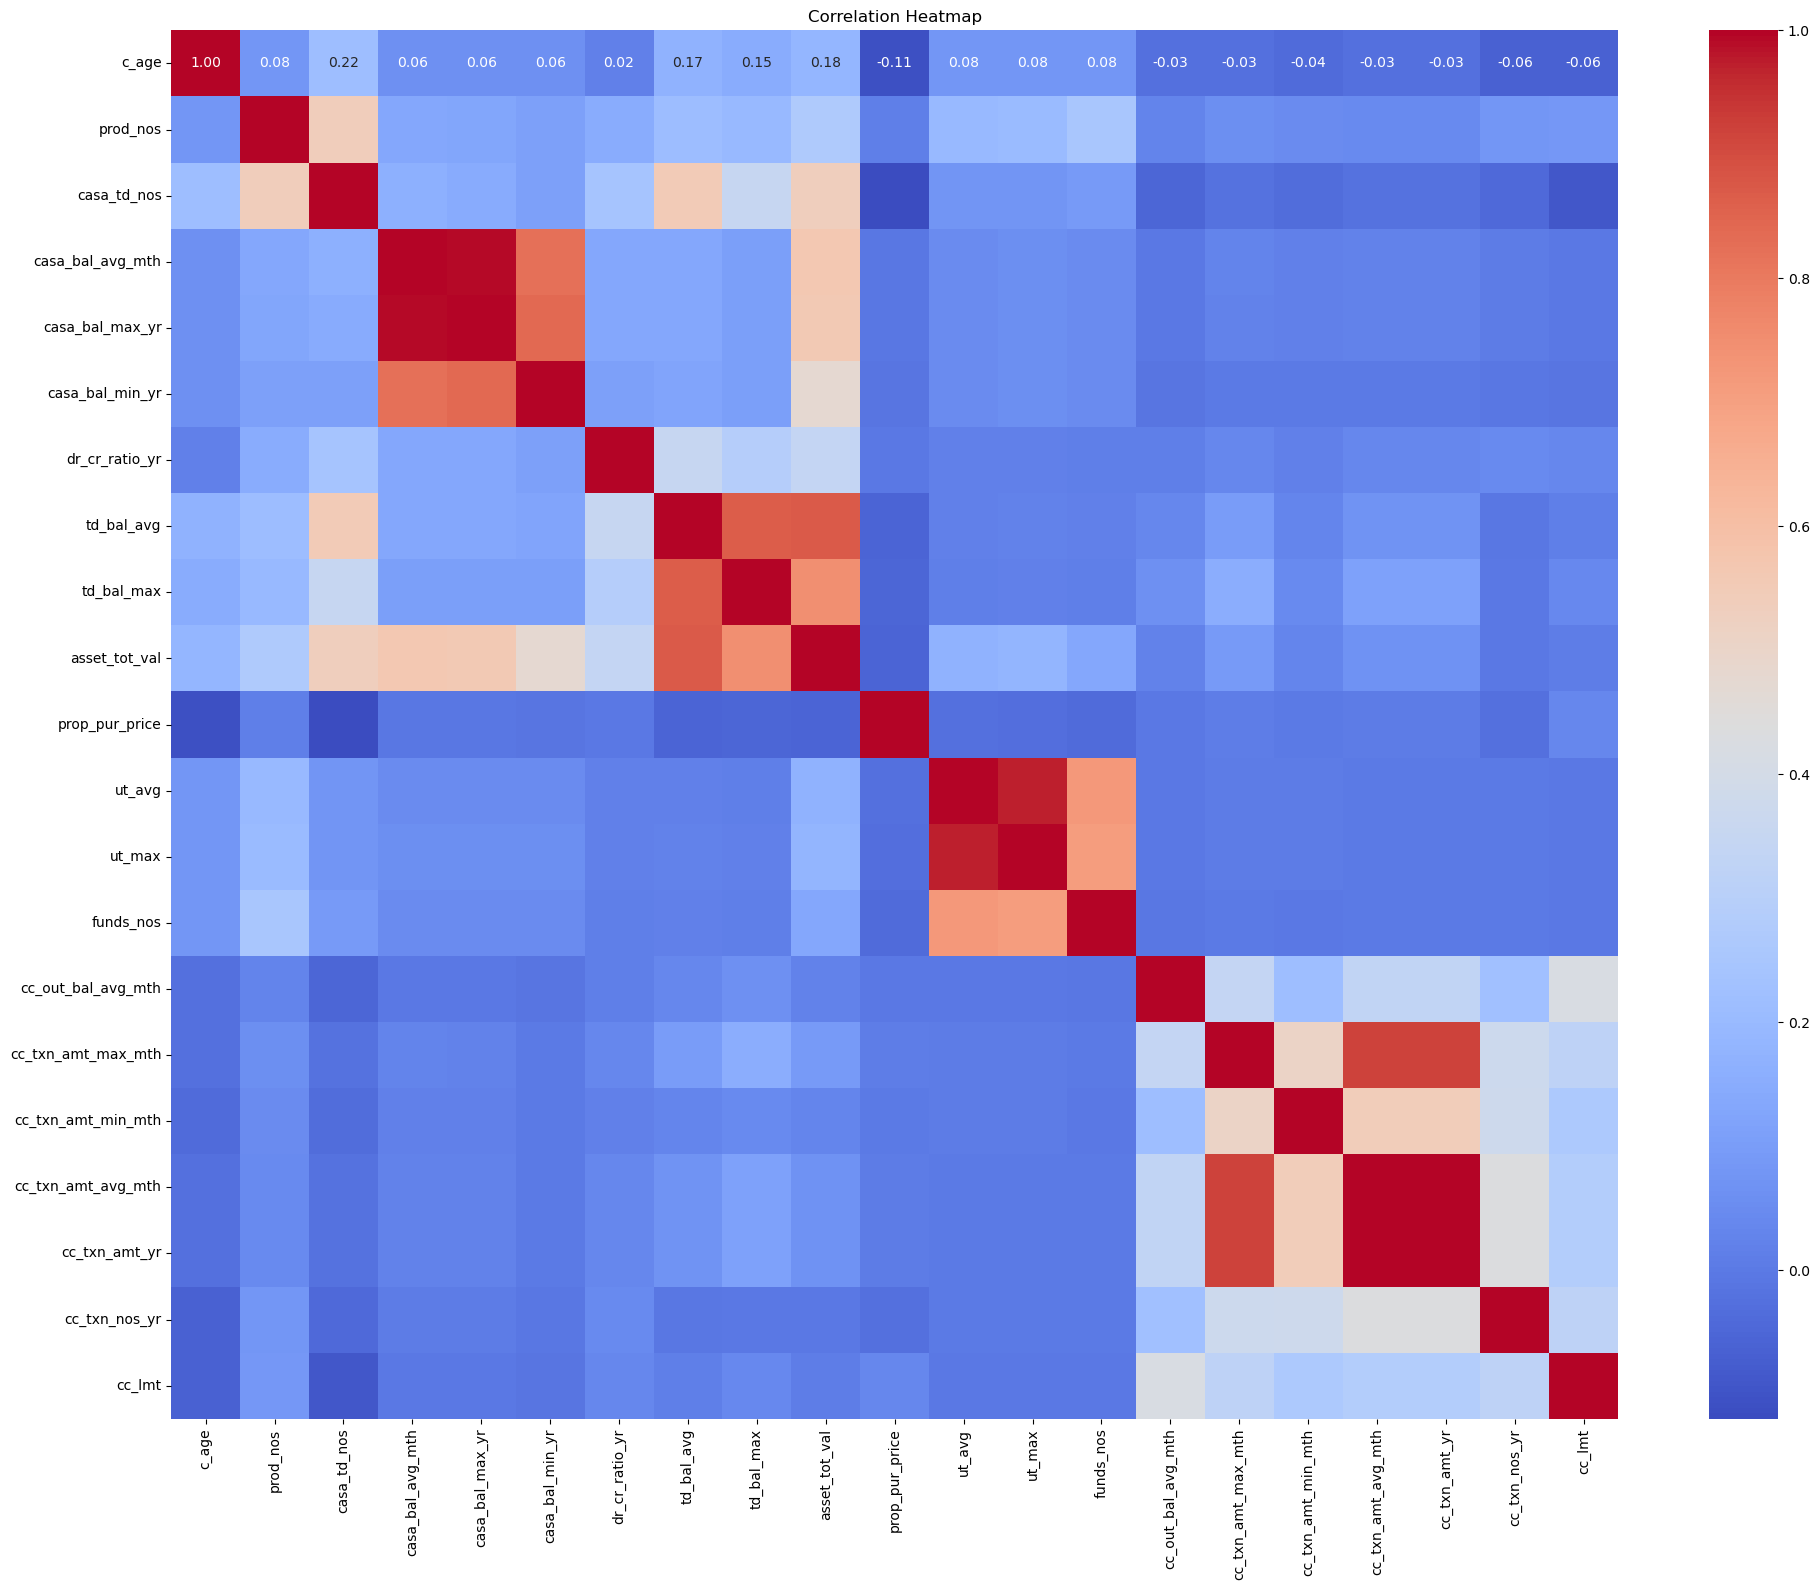

Maximum pairwise correlation: 1.00


In [10]:
numerical_cols = ['c_age', 'prod_nos',
                  'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr',
                  'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val',
                  'prop_pur_price', 'ut_avg', 'ut_max', 'funds_nos', 
                  'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth',
                  'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt']
categorical_cols = ['c_edu_encoded', 'c_hse_encoded', 'c_pc', 'c_incm_typ', 'c_occ_encoded',
                    'loan_home_tag', 'loan_auto_tag']

# Assuming df is your DataFrame
correlation_matrix = df_l2[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(20, 16))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

# Find the max correlation
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
max_correlation = upper_triangular.max().max()
print(f"Maximum pairwise correlation: {max_correlation:.2f}")

In [11]:
def corr_v(df_input, col1, col2):
    correlation_value = df_input[col1].corr(df_input[col2])
    return f"Correlation value between {col1} and {col2} is: {correlation_value}"
    
print(corr_v(df_l2, 'casa_bal_avg_mth', 'casa_bal_max_yr'))
print(corr_v(df_l2, 'td_bal_avg', 'td_bal_max'))
print(corr_v(df_l2, 'ut_avg', 'ut_max'))
print(corr_v(df_l2, 'cc_txn_amt_max_mth', 'cc_txn_amt_yr'))
print(corr_v(df_l2, 'cc_txn_amt_avg_mth', 'cc_txn_amt_yr'))

Correlation value between casa_bal_avg_mth and casa_bal_max_yr is: 0.9952754039918026
Correlation value between td_bal_avg and td_bal_max is: 0.8658776614243051
Correlation value between ut_avg and ut_max is: 0.9718044610367232
Correlation value between cc_txn_amt_max_mth and cc_txn_amt_yr is: 0.9198049861474934
Correlation value between cc_txn_amt_avg_mth and cc_txn_amt_yr is: 0.9999999999999998


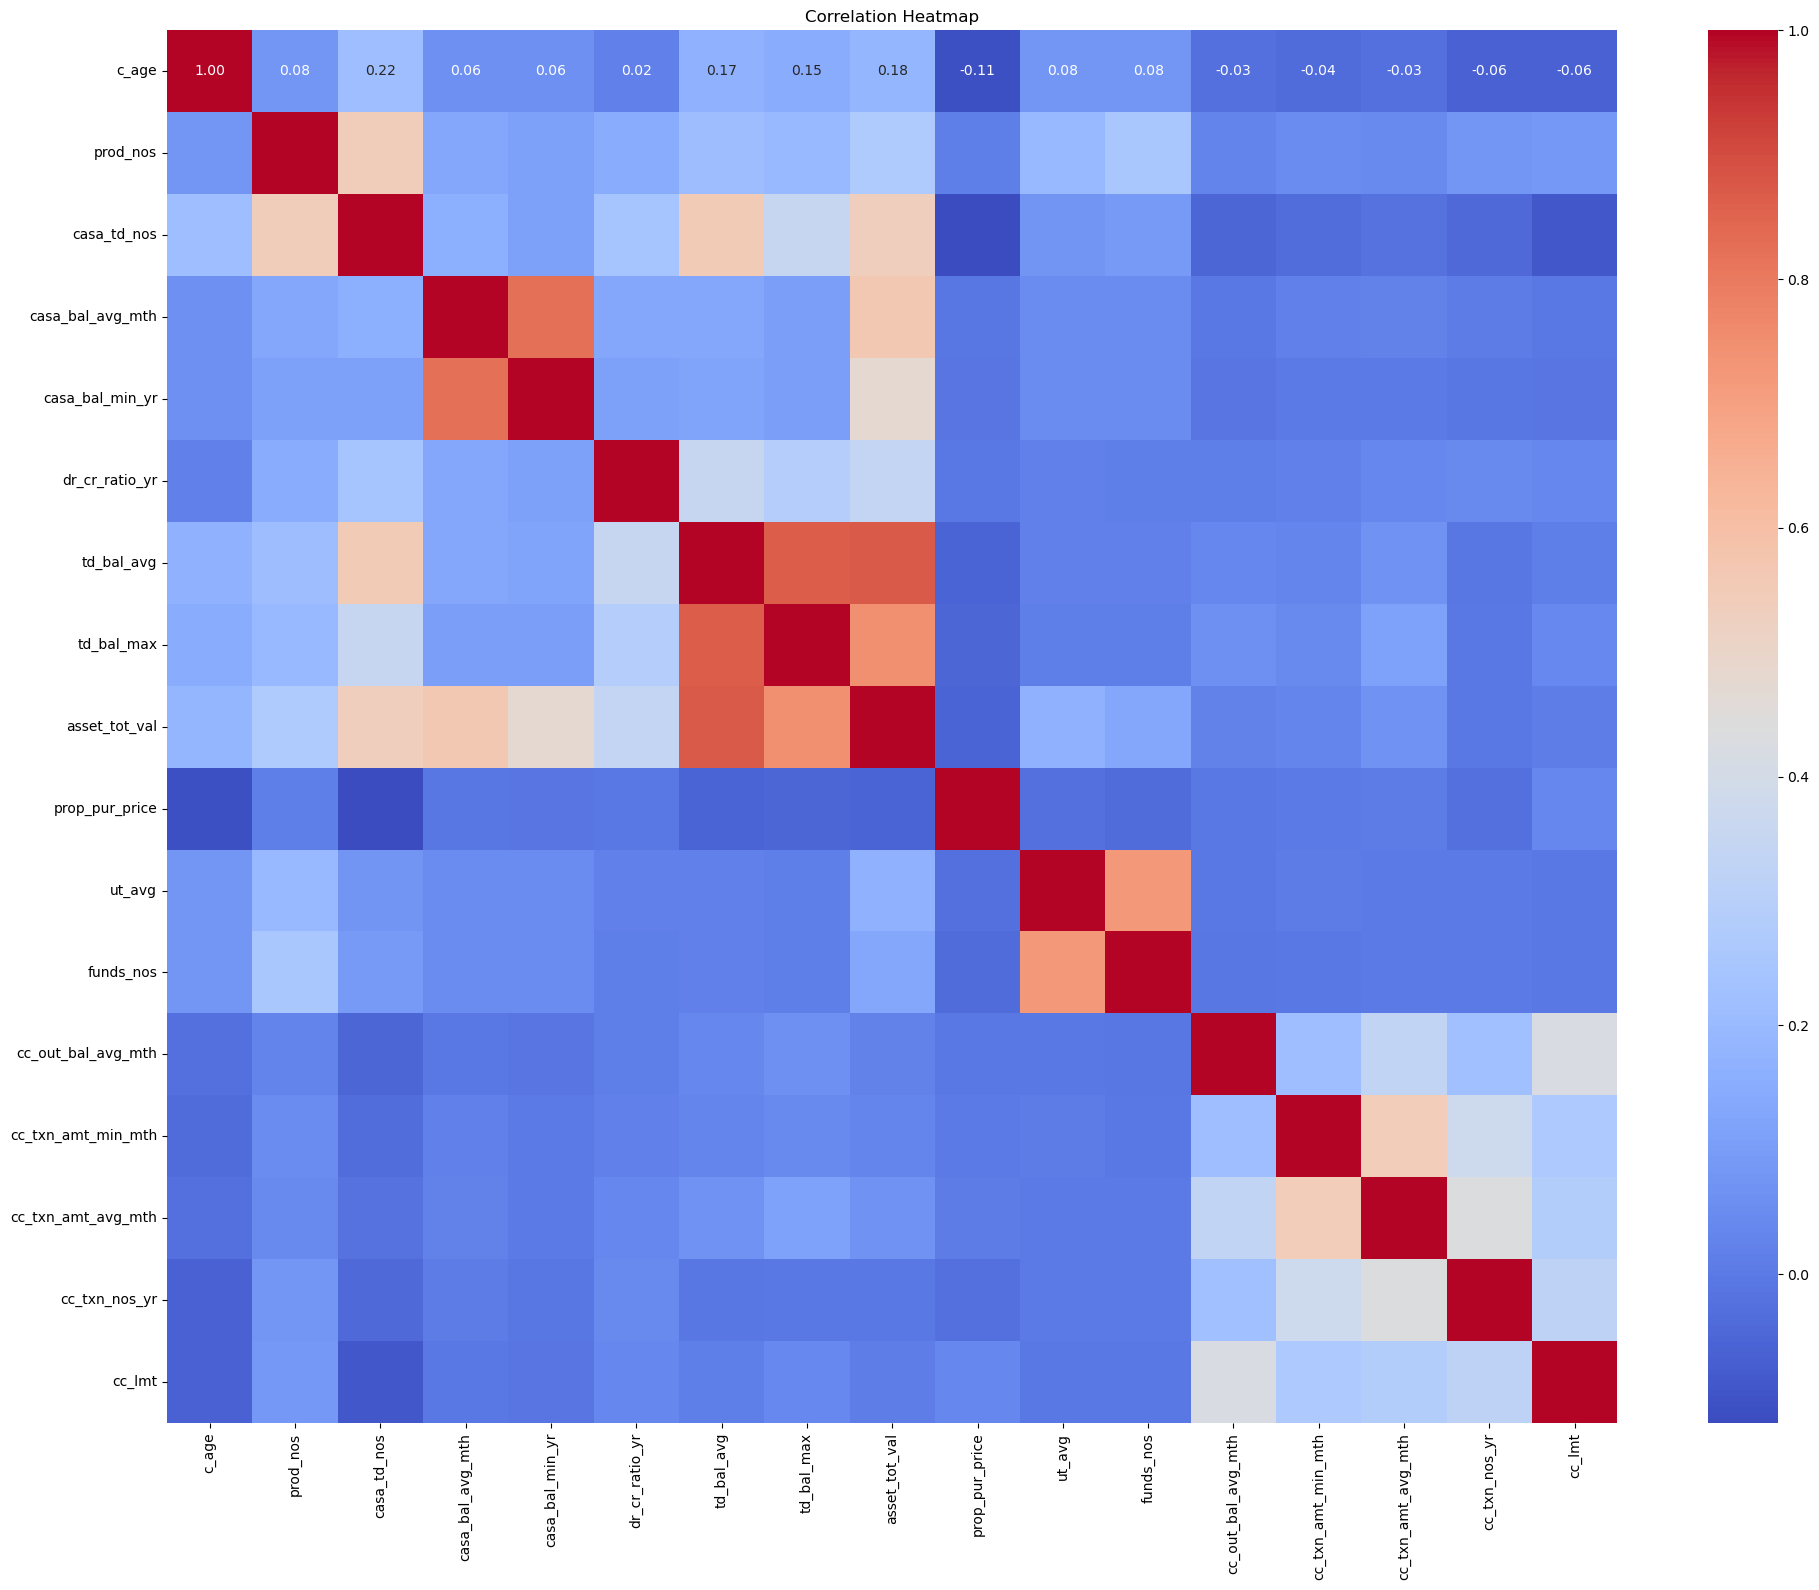

Maximum pairwise correlation: 0.87


In [12]:
# Remove all correlated features abv 0.9 (while still ensuring the model makes sense)
# Remove casa_bal_max_yr, ut_max, cc_txn_amt_max_mth, cc_txn_amt_yr
numerical_cols_v2 = ['c_age', 'prod_nos',
                  'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_min_yr',
                  'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val',
                  'prop_pur_price', 'ut_avg', 'funds_nos', 
                  'cc_out_bal_avg_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth',
                  'cc_txn_nos_yr', 'cc_lmt']
correlation_matrix = df_l2[numerical_cols_v2].corr()D
plt.figure(figsize=(20, 16))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Find the max correlation
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
max_correlation = upper_triangular.max().max()
print(f"Maximum pairwise correlation: {max_correlation:.2f}")

In [13]:
print(corr_v(df_l2, 'td_bal_max', 'td_bal_avg'))
print(corr_v(df_l2, 'td_bal_max', 'asset_tot_val'))
print(corr_v(df_l2, 'asset_tot_val', 'td_bal_avg'))
print(corr_v(df_l2, 'casa_bal_min_yr', 'casa_bal_avg_mth'))
print(corr_v(df_l2, 'casa_td_nos', 'prop_pur_price'))
print(corr_v(df_l2, 'ut_avg', 'funds_nos'))

Correlation value between td_bal_max and td_bal_avg is: 0.8658776614243052
Correlation value between td_bal_max and asset_tot_val is: 0.7476838427253267
Correlation value between asset_tot_val and td_bal_avg is: 0.8690692879504983
Correlation value between casa_bal_min_yr and casa_bal_avg_mth is: 0.8215228421104354
Correlation value between casa_td_nos and prop_pur_price is: -0.11967724688958777
Correlation value between ut_avg and funds_nos is: 0.7220364771193185


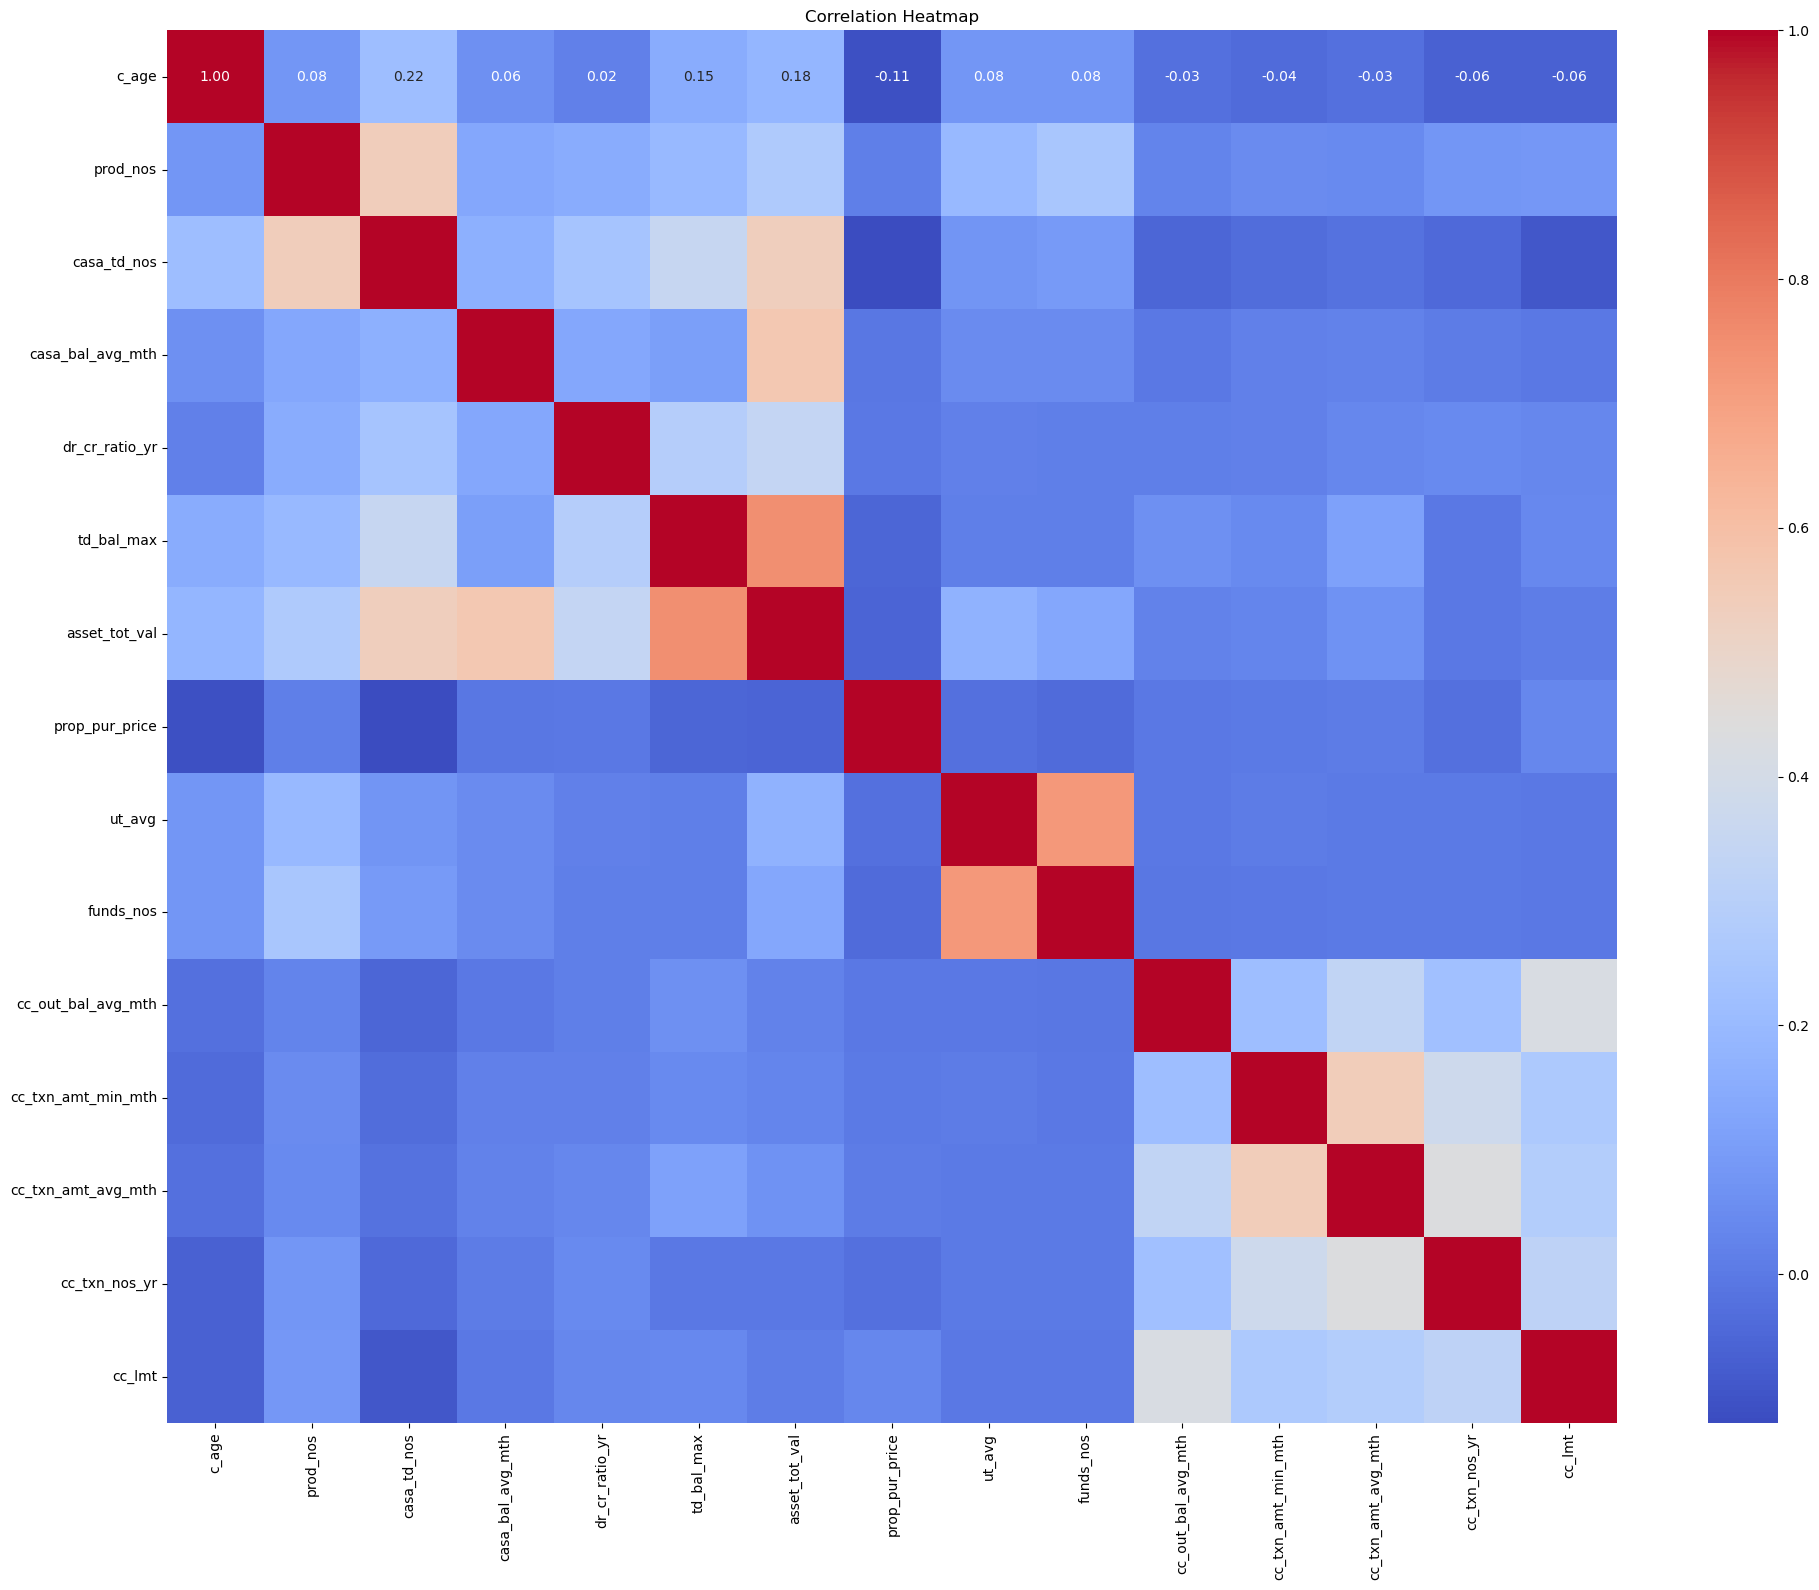

Maximum pairwise correlation: 0.75


In [14]:
# Remove all correlated features abv 0.8 (while still ensuring the model makes sense)
# Remove casa_bal_min_yr, td_bal_avg
numerical_cols_v3 = ['c_age', 'prod_nos',
                  'casa_td_nos', 'casa_bal_avg_mth',
                  'dr_cr_ratio_yr', 'td_bal_max', 'asset_tot_val',
                  'prop_pur_price', 'ut_avg', 'funds_nos', 
                  'cc_out_bal_avg_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth',
                  'cc_txn_nos_yr', 'cc_lmt']
correlation_matrix = df_l2[numerical_cols_v3].corr()
plt.figure(figsize=(20, 16))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Find the max correlation
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
max_correlation = upper_triangular.max().max()
print(f"Maximum pairwise correlation: {max_correlation:.2f}")

#### IV / WOE

In [15]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        print("Processing variable:", ivars)
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [16]:
numerical_cols = ['c_age', 'prod_nos',
                  'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr',
                  'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val',
                  'prop_pur_price', 'ut_avg', 'ut_max', 'funds_nos', 
                  'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth',
                  'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt']
categorical_cols = ['c_edu_encoded', 'c_hse_encoded', 'c_pc', 'c_incm_typ', 'c_occ_encoded',
                    'loan_home_tag', 'loan_auto_tag']
dependent_col = ['c_seg_encoded']
all_cols = numerical_cols + categorical_cols + dependent_col

IVDF, woeDF = iv_woe(df_l2[all_cols], 'c_seg_encoded', bins=10, show_woe=True)

Processing variable: c_age
Information value of c_age is 0.221514
  Variable         Cutoff     N  Events  % of Events  Non-Events  % of Non-Events       WoE        IV
0    c_age  (1.999, 34.0]  7247     412     0.037708        6835         0.123919 -1.189750  0.102569
1    c_age   (34.0, 40.0]  7247     641     0.058667        6606         0.119767 -0.713666  0.043605
2    c_age   (40.0, 44.0]  6128     764     0.069925        5364         0.097250 -0.329859  0.009013
3    c_age   (44.0, 48.0]  6672    1017     0.093081        5655         0.102526 -0.096645  0.000913
4    c_age   (48.0, 52.0]  7060    1322     0.120996        5738         0.104030  0.151073  0.002563
5    c_age   (52.0, 56.0]  6208    1275     0.116694        4933         0.089436  0.266037  0.007252
6    c_age   (56.0, 60.0]  6129    1065     0.097474        5064         0.091811  0.059857  0.000339
7    c_age   (60.0, 65.0]  6766    1459     0.133535        5307         0.096216  0.327763  0.012232
8    c_age   (65

C:\Users\lim\AppData\Local\Temp\ipykernel_23652\831347701.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\lim\AppData\Local\Temp\ipykernel_23652\831347701.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\lim\AppData\Local\Temp\ipykernel_23652\831347701.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu


Processing variable: funds_nos
Information value of funds_nos is 0.0
    Variable          Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  WoE   IV
0  funds_nos  (-0.001, 14.0]  66083   10926          1.0       55157              1.0  0.0  0.0
Processing variable: cc_out_bal_avg_mth
Information value of cc_out_bal_avg_mth is 0.013407
             Variable                Cutoff      N  Events  % of Events  Non-Events  % of Non-Events       WoE        IV
0  cc_out_bal_avg_mth      (-0.001, 15.345]  52866    9145     0.836994       43721         0.792665  0.054417  0.002412
1  cc_out_bal_avg_mth     (15.345, 343.305]   6608     923     0.084477        5685         0.103069 -0.198919  0.003698
2  cc_out_bal_avg_mth  (343.305, 201404.83]   6609     858     0.078528        5751         0.104266 -0.283487  0.007296
Processing variable: cc_txn_amt_max_mth
Information value of cc_txn_amt_max_mth is 7.6e-05
             Variable                Cutoff      N  Events  % of Events

C:\Users\lim\AppData\Local\Temp\ipykernel_23652\831347701.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\lim\AppData\Local\Temp\ipykernel_23652\831347701.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\lim\AppData\Local\Temp\ipykernel_23652\831347701.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

In [17]:
sorted_IVDF = IVDF.sort_values(by='IV', ascending=False)
display(sorted_IVDF)

,Variable,IV
0,dr_cr_ratio_yr,3.016198
0,asset_tot_val,2.139771
0,casa_bal_avg_mth,1.215648
0,casa_bal_max_yr,1.198604
0,prod_nos,1.137483
0,casa_bal_min_yr,1.039248
0,casa_td_nos,1.011414
0,td_bal_avg,0.879074
0,td_bal_max,0.816650
0,c_age,0.221514


#### Feature Importance

In [18]:
# Base Settings
df_l2 = df_l1.copy()
numerical_cols = ['c_age', 'prod_nos',
                  'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr',
                  'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val',
                  'prop_pur_price', 'ut_avg', 'ut_max', 'funds_nos', 
                  'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth',
                  'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt']
categorical_cols = ['c_edu_encoded', 'c_hse_encoded', 'c_pc', 'c_incm_typ', 'c_occ_encoded',
                    'loan_home_tag', 'loan_auto_tag']
dependent_col = ['c_seg_encoded']
independent_col = numerical_cols + categorical_cols
all_cols = numerical_cols + categorical_cols + dependent_col

In [19]:
# Settings Train / Test Split. 
# We will not be doing Train / Validation / Test split as this is for feature importance only.
from sklearn.model_selection import train_test_split

# Splitting into Training and Holdout Test Sets
# Ensure stratification for now. We will adjust the ratio only later if required.
X_train, X_test, y_train, y_test = train_test_split(df_l2[independent_col], df_l2[dependent_col],\
                                                    stratify=df_l2[dependent_col], test_size=0.2, random_state=88)

# From Standard Scaler for Numerical Columns (when necessary) Eg. Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(\
    transformers=[('num', StandardScaler(), numerical_cols)],\
    remainder='passthrough') # Pass through categorical features unchanged

X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=independent_col)
X_test_transformed = preprocessor.fit_transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=independent_col)
y_train_transformed = y_train.values.ravel()
y_test_transformed = y_test.values.ravel()

In [20]:
X_train_transformed_df
X_train

,c_age,prod_nos,casa_td_nos,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr,dr_cr_ratio_yr,td_bal_avg,td_bal_max,asset_tot_val,prop_pur_price,ut_avg,ut_max,funds_nos,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt,c_edu_encoded,c_hse_encoded,c_pc,c_incm_typ,c_occ_encoded,loan_home_tag,loan_auto_tag
28318,64,1,0,0.00,0.00,0.00,2247.000000,0.00,0.00,0.00,0.0,0.00000,0.00,0,0.0000,0.00,0.00,0.000000,0.00,0,0.0,0,0,60214,0,1,0,0
50687,56,1,0,0.00,0.00,0.00,2247.000000,0.00,0.00,0.00,0.0,0.00000,0.00,0,13.8475,127.44,27.10,19.597500,235.17,6,9000.0,5,5,42319,4,6,0,0
5787,62,4,2,40839.94,40839.94,40839.94,0.889798,100000.00,100000.00,140839.94,0.0,0.00000,0.00,0,227.1425,1220.02,64.86,324.547500,3894.57,35,11500.0,0,7,10099,4,6,0,0
28046,56,1,0,0.00,0.00,0.00,2247.000000,0.00,0.00,0.00,0.0,0.00000,0.00,0,0.0000,0.00,0.00,0.000000,0.00,0,0.0,0,0,69277,0,3,0,0
38956,40,1,0,0.00,0.00,0.00,2247.000000,0.00,0.00,0.00,120999.0,0.00000,0.00,0,0.0000,0.00,0.00,0.000000,0.00,0,0.0,2,0,84490,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44040,35,1,0,0.00,0.00,0.00,2247.000000,0.00,0.00,0.00,0.0,0.00000,0.00,0,728.1825,6231.24,14.04,1144.731667,13736.78,51,16300.0,6,3,60155,4,6,0,0
20396,47,2,0,0.00,0.00,0.00,2247.000000,0.00,0.00,0.00,0.0,0.00000,0.00,0,0.0000,0.00,0.00,0.000000,0.00,0,0.0,0,0,48693,4,6,0,0
3588,51,2,2,64219.76,64219.76,64219.76,40000.000000,26479.26,26479.26,90699.02,0.0,0.00000,0.00,0,0.0000,0.00,0.00,0.000000,0.00,0,0.0,0,0,80572,0,4,0,0
2575,51,5,2,8069.33,8069.33,8069.33,2.507245,20000.00,20000.00,159388.41,0.0,132976.56583,142046.26,4,0.0000,0.00,0.00,0.000000,0.00,0,0.0,0,0,58583,4,6,0,0


In [21]:
# Function for getting feature importance sorted.
def feature_importance_sorted(classification_model_input, X_train, y_train, feature_importance_input=None):
    if classification_model_input is not None:
        some_model = classification_model_input
        some_model.fit(X_train, y_train)
        feature_importances = some_model.feature_importances_
    else:
        feature_importances = feature_importance_input
    feature_importances_sorted = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)
    df_feature_importances = pd.DataFrame(feature_importances_sorted, columns=['Feature', 'Importance'])
    for feature_name, importance in feature_importances_sorted:
        print(f"Feature {feature_name}: {importance}")

    df_feature_importances['rank'] = range(1, len(df_feature_importances)+1)
    return df_feature_importances

In [22]:
# Decision Tree Classifier Feature Importance
from sklearn.tree import DecisionTreeClassifier
dtc_fi = feature_importance_sorted(DecisionTreeClassifier(), X_train, y_train)

Feature asset_tot_val: 0.3238428675532276
Feature dr_cr_ratio_yr: 0.29853321942488775
Feature c_pc: 0.06291535435608023
Feature c_age: 0.05457201070389924
Feature casa_bal_min_yr: 0.03370169837726757
Feature casa_bal_avg_mth: 0.033399114072355185
Feature casa_bal_max_yr: 0.02646478873733904
Feature prod_nos: 0.01977605653861964
Feature ut_avg: 0.015352398601226043
Feature c_occ_encoded: 0.015184119202174216
Feature td_bal_max: 0.015138753045001443
Feature c_incm_typ: 0.01399880796286228
Feature td_bal_avg: 0.011452332477970915
Feature c_edu_encoded: 0.011402299404506572
Feature casa_td_nos: 0.010140796776802307
Feature cc_lmt: 0.009598829625014696
Feature c_hse_encoded: 0.008238522222505621
Feature ut_max: 0.005937455826099143
Feature cc_out_bal_avg_mth: 0.005514980500411145
Feature prop_pur_price: 0.005017008025061837
Feature cc_txn_amt_min_mth: 0.004911758305046025
Feature cc_txn_nos_yr: 0.004335102768212392
Feature cc_txn_amt_max_mth: 0.0039989714033250145
Feature cc_txn_amt_avg_mth

In [23]:
# Random Forest Classifier Feature Importance
from sklearn.ensemble import RandomForestClassifier
rfc_fi = feature_importance_sorted(RandomForestClassifier(), X_train, y_train.values.ravel())

Feature dr_cr_ratio_yr: 0.2194765814965254
Feature asset_tot_val: 0.1487147346105629
Feature casa_bal_max_yr: 0.06988780331098553
Feature casa_bal_avg_mth: 0.0683750959466053
Feature casa_bal_min_yr: 0.062917909887329
Feature td_bal_avg: 0.05438903864790346
Feature c_pc: 0.0503465682857981
Feature c_age: 0.04983680903066694
Feature casa_td_nos: 0.04398516953136086
Feature prod_nos: 0.039012769138099694
Feature td_bal_max: 0.03633336232522378
Feature ut_avg: 0.0190789504853325
Feature ut_max: 0.01837576915311486
Feature c_occ_encoded: 0.017959637019886864
Feature c_incm_typ: 0.015462740408974395
Feature funds_nos: 0.01296490022954426
Feature c_edu_encoded: 0.01280695123259145
Feature c_hse_encoded: 0.009015391554809345
Feature cc_lmt: 0.008814336516561978
Feature cc_out_bal_avg_mth: 0.006874276747051734
Feature cc_txn_amt_min_mth: 0.005758759215509191
Feature cc_txn_amt_max_mth: 0.0057377511229289
Feature cc_txn_nos_yr: 0.005613927382476582
Feature cc_txn_amt_avg_mth: 0.0054222132579235

In [24]:
# XGB Feature Importance
import xgboost as xgb
xgb_fi = feature_importance_sorted(xgb.XGBClassifier(), X_train, y_train)

Feature asset_tot_val: 0.306334525346756
Feature dr_cr_ratio_yr: 0.16422311961650848
Feature ut_avg: 0.07499787956476212
Feature prod_nos: 0.051602352410554886
Feature ut_max: 0.03097742423415184
Feature prop_pur_price: 0.02671661041676998
Feature casa_td_nos: 0.023865245282649994
Feature c_age: 0.022810984402894974
Feature casa_bal_min_yr: 0.019668614491820335
Feature loan_home_tag: 0.018604271113872528
Feature casa_bal_max_yr: 0.01812089793384075
Feature c_edu_encoded: 0.01804698258638382
Feature td_bal_avg: 0.017455482855439186
Feature casa_bal_avg_mth: 0.017211010679602623
Feature c_pc: 0.017137255519628525
Feature cc_txn_nos_yr: 0.016833944246172905
Feature c_incm_typ: 0.01594397984445095
Feature cc_txn_amt_min_mth: 0.015752427279949188
Feature c_hse_encoded: 0.014801074750721455
Feature c_occ_encoded: 0.014773394912481308
Feature td_bal_max: 0.014270352199673653
Feature cc_txn_amt_max_mth: 0.014228585176169872
Feature cc_lmt: 0.014011646620929241
Feature loan_auto_tag: 0.01346172

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train.values.ravel())
feature_importances = lr.coef_[0]  # Assuming binary classification
lr_fi = feature_importance_sorted(None, X_train, y_train.values.ravel(), feature_importances)

Feature casa_td_nos: 0.032678835885301655
Feature prod_nos: 0.022402696619641532
Feature funds_nos: 0.0018835411545895726
Feature loan_home_tag: 0.001482301697080515
Feature cc_txn_nos_yr: 0.0008443692020889015
Feature asset_tot_val: 3.8793862833278505e-05
Feature ut_avg: 2.7484781268885215e-05
Feature casa_bal_min_yr: 1.1169694707892317e-05
Feature td_bal_max: 6.425462270187578e-06
Feature dr_cr_ratio_yr: 2.8631812826850413e-06
Feature cc_txn_amt_avg_mth: -4.59790672516207e-07
Feature cc_txn_amt_max_mth: -8.147228189267901e-07
Feature casa_bal_avg_mth: -2.52480597881088e-06
Feature cc_lmt: -3.228100600925015e-06
Feature prop_pur_price: -3.5106488688718024e-06
Feature ut_max: -4.645712152985171e-06
Feature cc_txn_amt_yr: -5.517513356429351e-06
Feature c_pc: -8.491990962981697e-06
Feature cc_txn_amt_min_mth: -2.5740434720119956e-05
Feature td_bal_avg: -3.2811527142090444e-05
Feature casa_bal_max_yr: -3.334902750465288e-05
Feature cc_out_bal_avg_mth: -6.953330723497504e-05
Feature c_hse_

In [26]:
dtc_fi = dtc_fi.rename(columns={'Importance': 'imp_dtc', 'rank': 'rank_dtc'})
rfc_fi = rfc_fi.rename(columns={'Importance': 'imp_rfc', 'rank': 'rank_rfc'})
xgb_fi = xgb_fi.rename(columns={'Importance': 'imp_xgb', 'rank': 'rank_xgb'})
lr_fi = lr_fi.rename(columns={'Importance': 'imp_lr', 'rank': 'rank_lr'})

merged_df = dtc_fi.merge(rfc_fi, on='Feature', how='left')\
                  .merge(xgb_fi, on='Feature', how='left')\
                  .merge(lr_fi, on='Feature', how='left')

merged_df

,Feature,imp_dtc,rank_dtc,imp_rfc,rank_rfc,imp_xgb,rank_xgb,imp_lr,rank_lr
0,asset_tot_val,0.323843,1,0.148715,2,0.306335,1,3.879386e-05,6
1,dr_cr_ratio_yr,0.298533,2,0.219477,1,0.164223,2,2.863181e-06,10
2,c_pc,0.062915,3,0.050347,7,0.017137,15,-8.491991e-06,18
3,c_age,0.054572,4,0.049837,8,0.022811,8,-3.216415e-02,27
4,casa_bal_min_yr,0.033702,5,0.062918,5,0.019669,9,1.116969e-05,8
5,casa_bal_avg_mth,0.033399,6,0.068375,4,0.017211,14,-2.524806e-06,13
6,casa_bal_max_yr,0.026465,7,0.069888,3,0.018121,11,-3.334903e-05,21
7,prod_nos,0.019776,8,0.039013,10,0.051602,4,2.240270e-02,2
8,ut_avg,0.015352,9,0.019079,12,0.074998,3,2.748478e-05,7
9,c_occ_encoded,0.015184,10,0.017960,14,0.014773,20,-3.265321e-02,28


In [27]:
merged_df = dtc_fi.merge(rfc_fi, on='Feature', how='left')
merged_df

,Feature,imp_dtc,rank_dtc,imp_rfc,rank_rfc
0,asset_tot_val,0.323843,1,0.148715,2
1,dr_cr_ratio_yr,0.298533,2,0.219477,1
2,c_pc,0.062915,3,0.050347,7
3,c_age,0.054572,4,0.049837,8
4,casa_bal_min_yr,0.033702,5,0.062918,5
5,casa_bal_avg_mth,0.033399,6,0.068375,4
6,casa_bal_max_yr,0.026465,7,0.069888,3
7,prod_nos,0.019776,8,0.039013,10
8,ut_avg,0.015352,9,0.019079,12
9,c_occ_encoded,0.015184,10,0.017960,14


In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_transformed_df, y_train.values.ravel())
from sklearn.inspection import permutation_importance
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42)
feature_importances = result.importances_mean
lr_fi = feature_importance_sorted(None, X_train, y_train.values.ravel(), feature_importances)

Feature asset_tot_val: 0.030014375425588248
Feature prop_pur_price: 0.02141181811303623
Feature casa_bal_avg_mth: 0.017462359082999153
Feature casa_bal_max_yr: 0.016841945978663828
Feature td_bal_avg: 0.0154497995006431
Feature td_bal_max: 0.015359007339033049
Feature casa_bal_min_yr: 0.015245517137020487
Feature dr_cr_ratio_yr: 0.013021109177574324
Feature ut_avg: 0.0030718014678065954
Feature ut_max: 0.0030642354543390926
Feature cc_lmt: 0.0005977150639327966
Feature cc_txn_amt_yr: 0.00034803661950516817
Feature cc_txn_amt_max_mth: 0.00012862222894755303
Feature cc_txn_amt_avg_mth: 6.809412120752645e-05
Feature c_age: 5.296209427251841e-05
Feature cc_txn_amt_min_mth: 3.783006733751315e-05
Feature cc_txn_nos_yr: 1.513202693500526e-05
Feature prod_nos: 7.56601346750263e-06
Feature casa_td_nos: 7.56601346750263e-06
Feature funds_nos: 0.0
Feature c_edu_encoded: 0.0
Feature c_hse_encoded: 0.0
Feature c_pc: 0.0
Feature c_incm_typ: 0.0
Feature c_occ_encoded: 0.0
Feature loan_home_tag: 0.0
F

#### Statistical Tests

In [29]:
df_l2 = df_l1.copy()
numerical_cols = ['c_age', 'prod_nos',
                  'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr',
                  'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val',
                  'prop_pur_price', 'ut_avg', 'ut_max', 'funds_nos', 
                  'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth',
                  'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt']
categorical_cols = ['c_edu_encoded', 'c_hse_encoded', 'c_pc', 'c_incm_typ', 'c_occ_encoded',
                    'loan_home_tag', 'loan_auto_tag']
dependent_col = ['c_seg_encoded']
independent_col = numerical_cols + categorical_cols
all_cols = numerical_cols + categorical_cols + dependent_col

In [30]:
aff_df = df_l2[df_l2['c_seg_encoded']==1]
norm_df = df_l2[df_l2['c_seg_encoded']==0]
norm_df_2 = norm_df.sample(frac=0.2, random_state=88) 
# Using a smaller sample of the norm_df, since original norm_df is 5x bigger.
# Don't anticipate much change but just trying.

In [31]:
from scipy.stats import ttest_ind
def individual_t_test(df_1, df_2, listoffeatures, alpha_val):
    '''
    For continuous variable individual t-tests
    '''
    newlist = []
    for feature in listoffeatures:
        fea_1 = df_1[feature]
        fea_2 = df_2[feature]

        t_stat, p_val = ttest_ind(fea_1, fea_2, equal_var=False)
        t_stat1 = f'{t_stat:.3f}'
        p_val1 = f'{p_val:.3f}'
        
        if p_val < alpha_val:
            sig = 'Significant'
        else:
            sig = 'Insignificant'

        newdict = {'feature': feature, 't_stat': t_stat1,
                   'p_value': p_val1, 'significance': sig}
        newlist.append(newdict)

    df_result = pd.DataFrame(newlist)
    return df_result

In [32]:
individual_t_test(aff_df, norm_df, numerical_cols, 0.05)

,feature,t_stat,p_value,significance
0,c_age,40.575,0.000,Significant
1,prod_nos,95.370,0.000,Significant
2,casa_td_nos,77.848,0.000,Significant
3,casa_bal_avg_mth,23.606,0.000,Significant
4,casa_bal_max_yr,22.663,0.000,Significant
5,casa_bal_min_yr,19.699,0.000,Significant
6,dr_cr_ratio_yr,22.239,0.000,Significant
7,td_bal_avg,40.829,0.000,Significant
8,td_bal_max,39.549,0.000,Significant
9,asset_tot_val,52.900,0.000,Significant


In [33]:
individual_t_test(aff_df, norm_df_2, numerical_cols, 0.05)

,feature,t_stat,p_value,significance
0,c_age,29.420,0.000,Significant
1,prod_nos,78.912,0.000,Significant
2,casa_td_nos,70.104,0.000,Significant
3,casa_bal_avg_mth,21.094,0.000,Significant
4,casa_bal_max_yr,20.192,0.000,Significant
5,casa_bal_min_yr,19.252,0.000,Significant
6,dr_cr_ratio_yr,21.594,0.000,Significant
7,td_bal_avg,35.630,0.000,Significant
8,td_bal_max,29.438,0.000,Significant
9,asset_tot_val,46.957,0.000,Significant


#### Further Data Analysis (Understanding the Affluent Sector and Comparing to the Normal Sector)

In [34]:
df_l2 = df_l1.copy()
numerical_cols = ['c_age', 'prod_nos',
                  'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr',
                  'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val',
                  'prop_pur_price', 'ut_avg', 'ut_max', 'funds_nos', 
                  'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth',
                  'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt']
categorical_cols = ['c_edu_encoded', 'c_hse_encoded', 'c_pc', 'c_incm_typ', 'c_occ_encoded',
                    'loan_home_tag', 'loan_auto_tag']
dependent_col = ['c_seg_encoded']
independent_col = numerical_cols + categorical_cols
all_cols = numerical_cols + categorical_cols + dependent_col

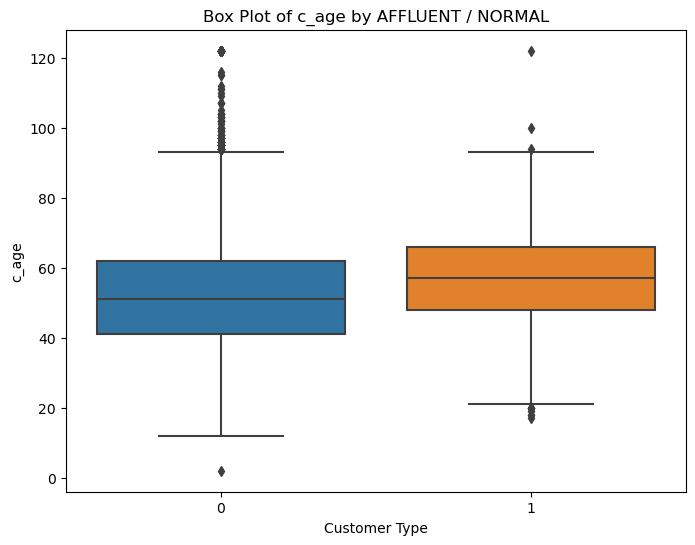

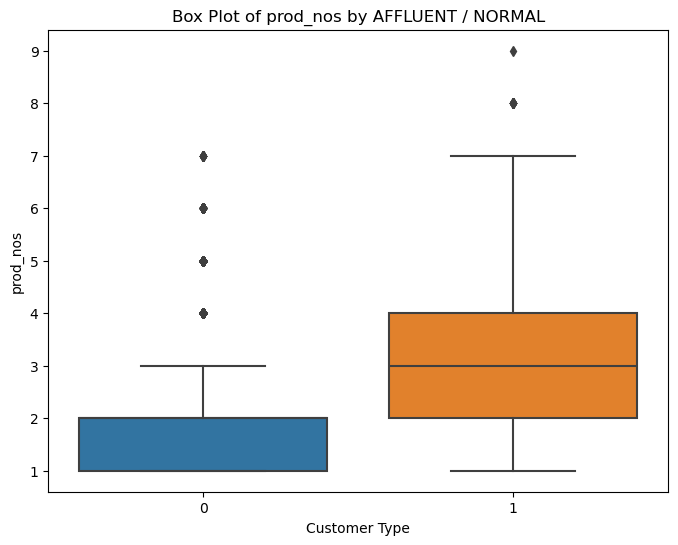

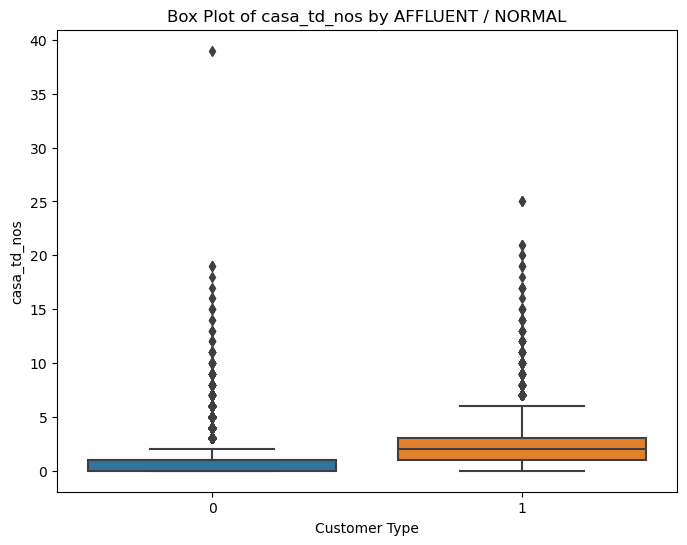

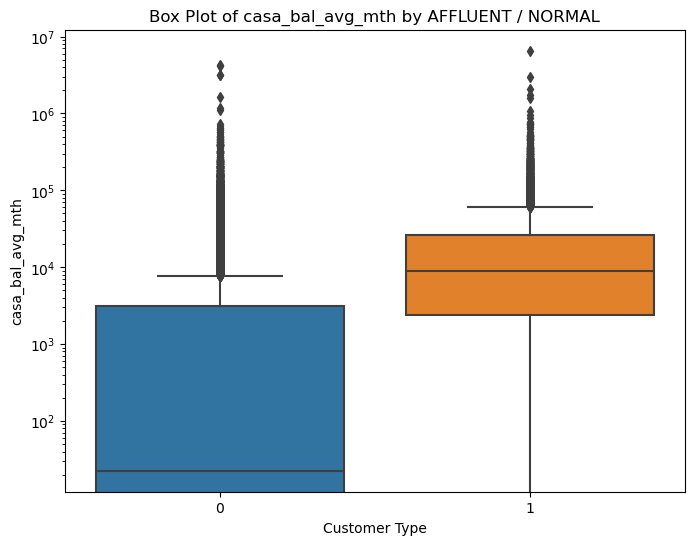

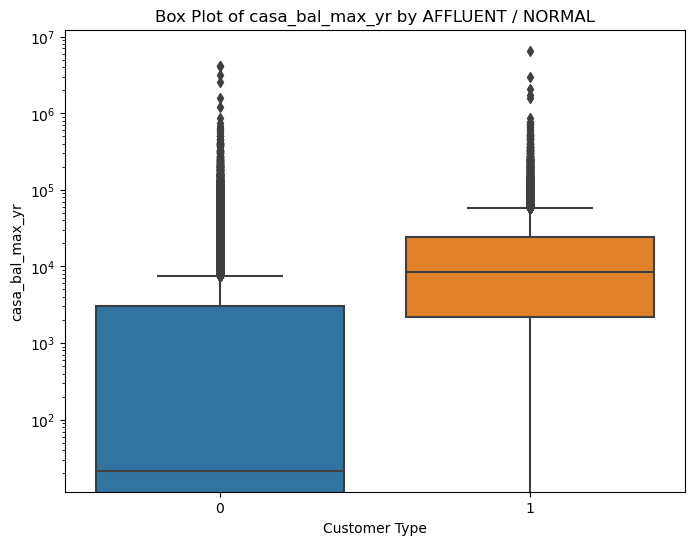

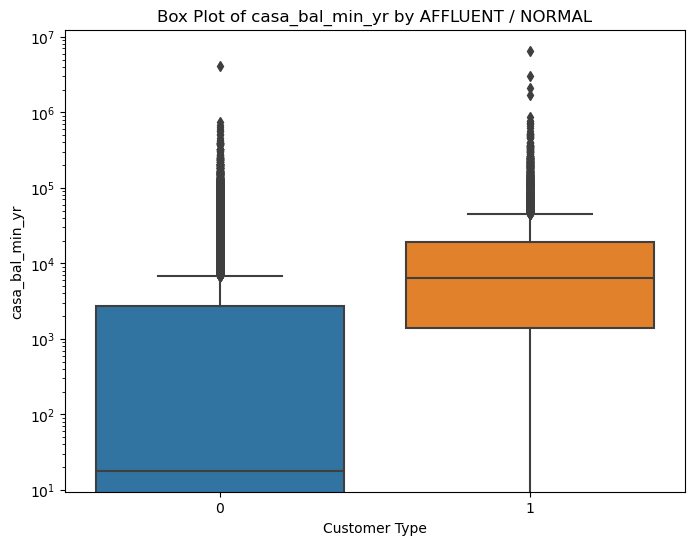

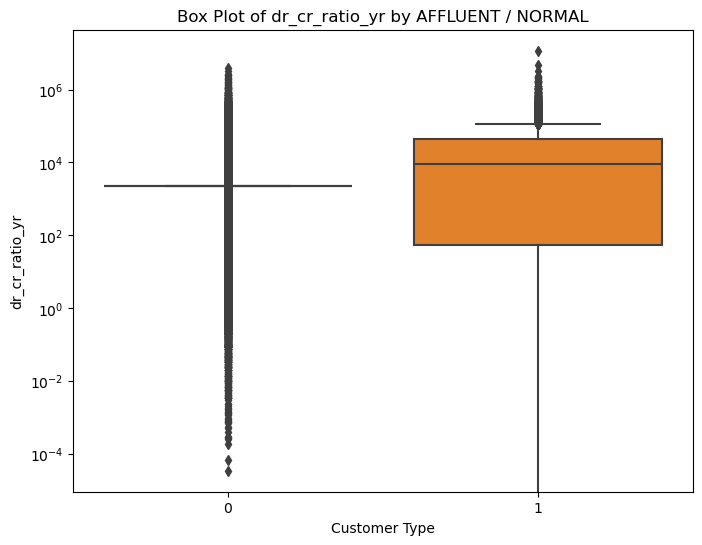

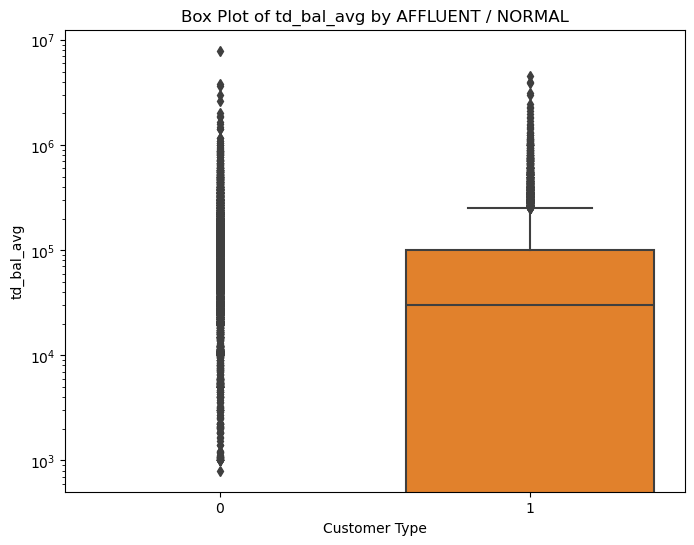

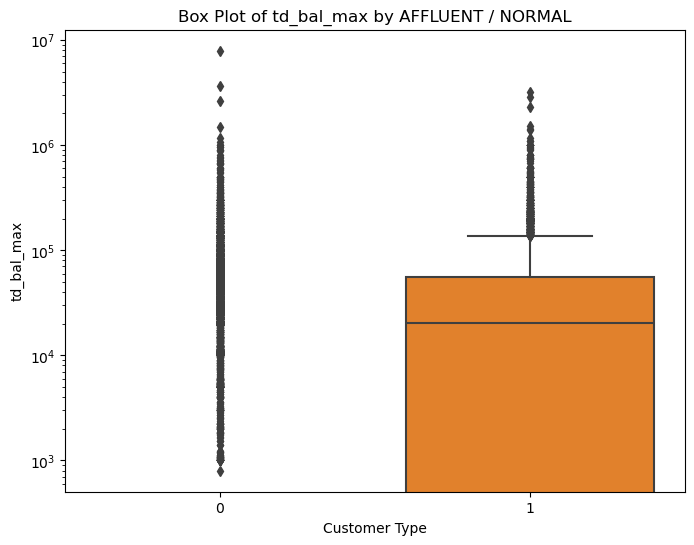

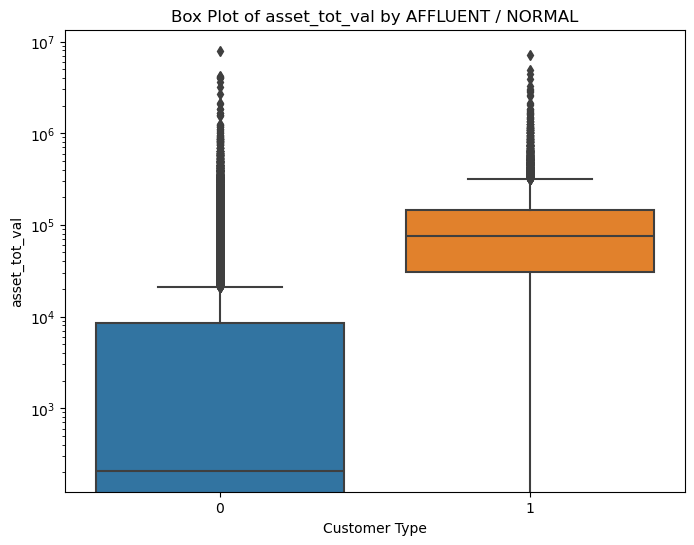

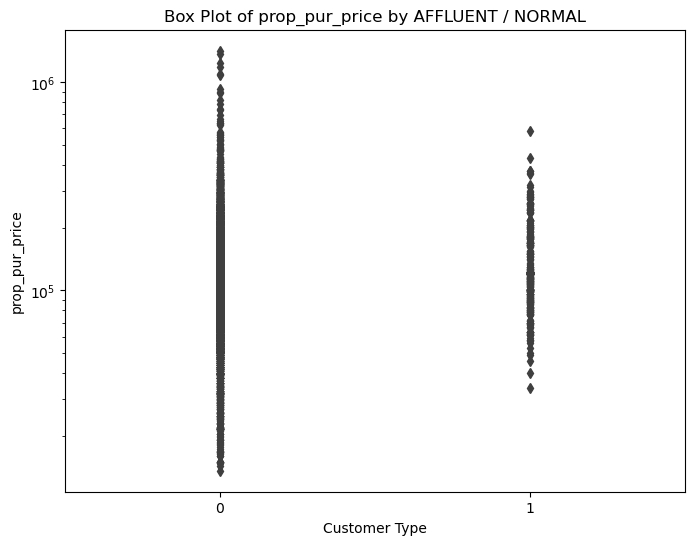

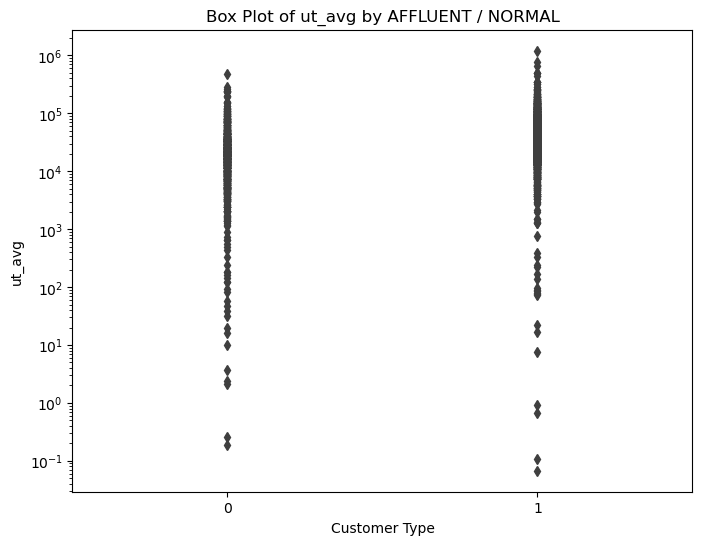

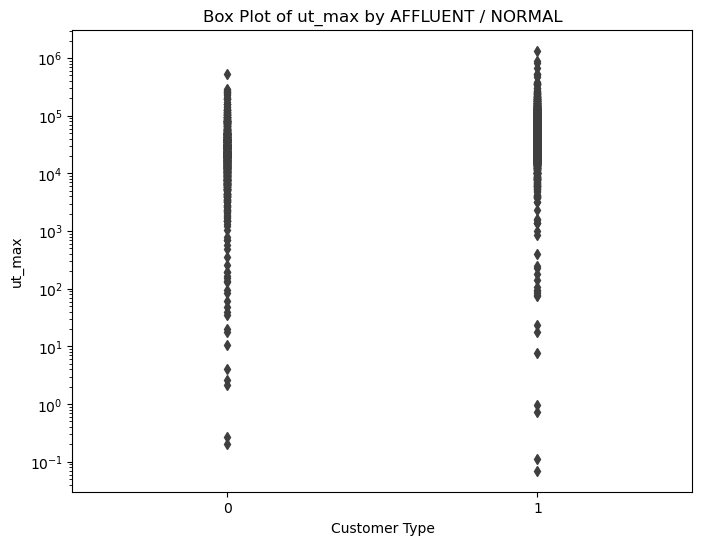

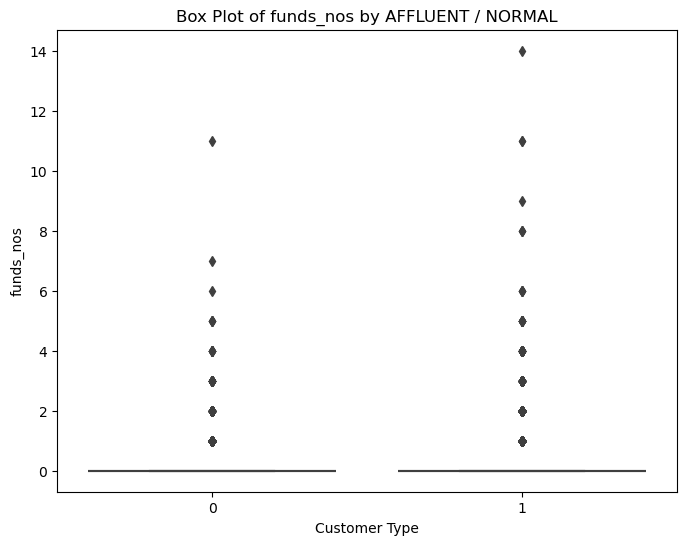

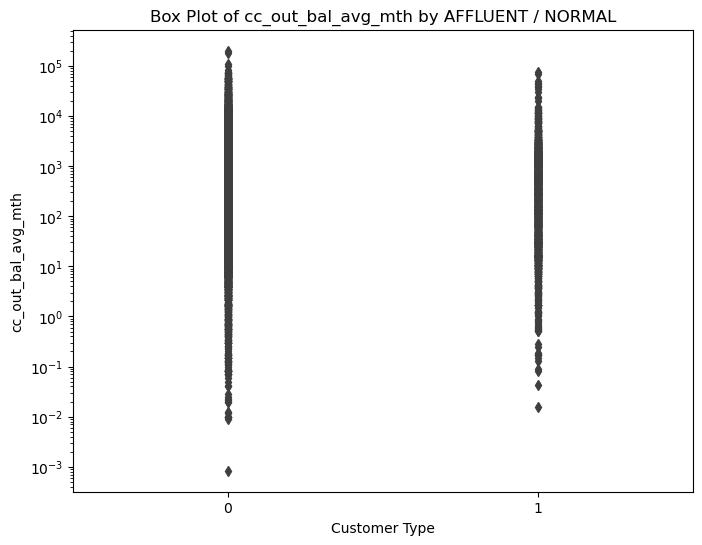

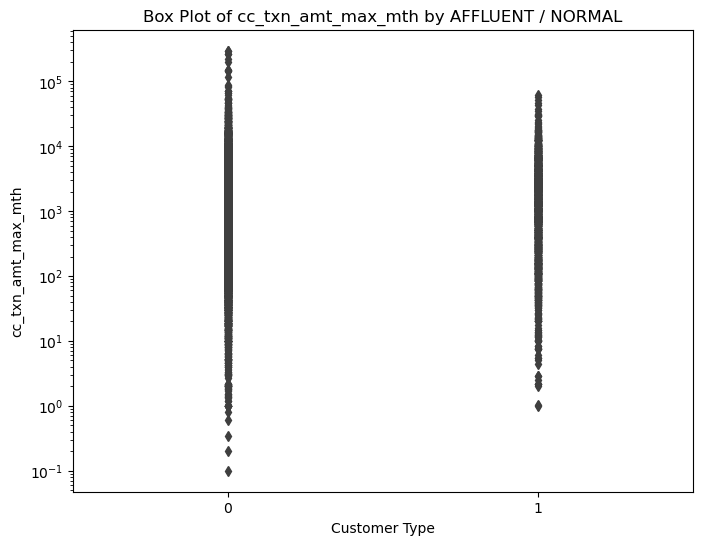

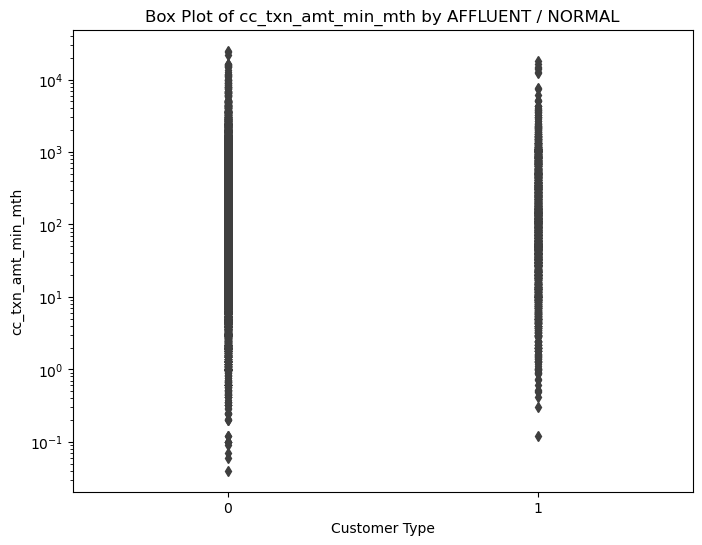

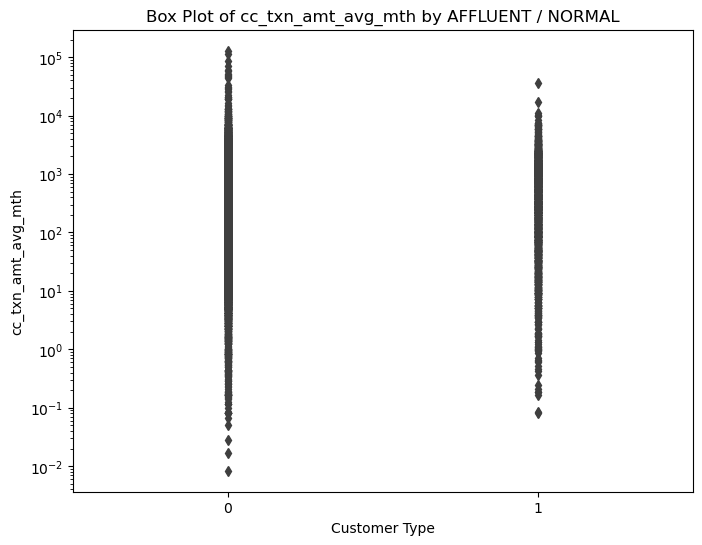

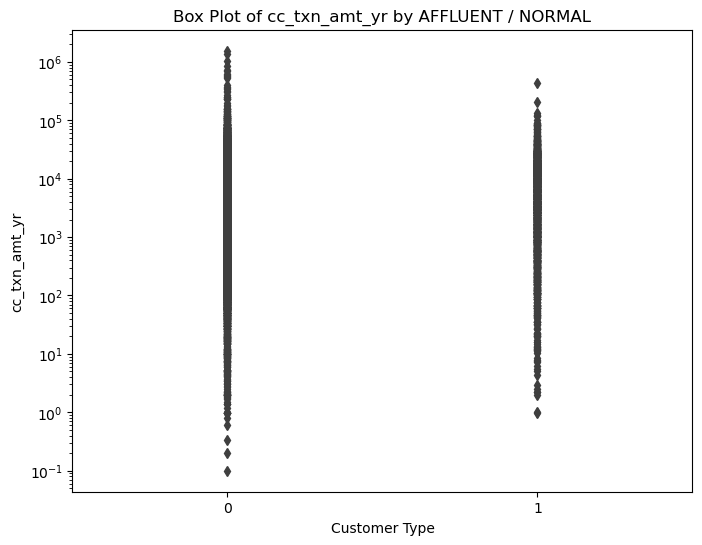

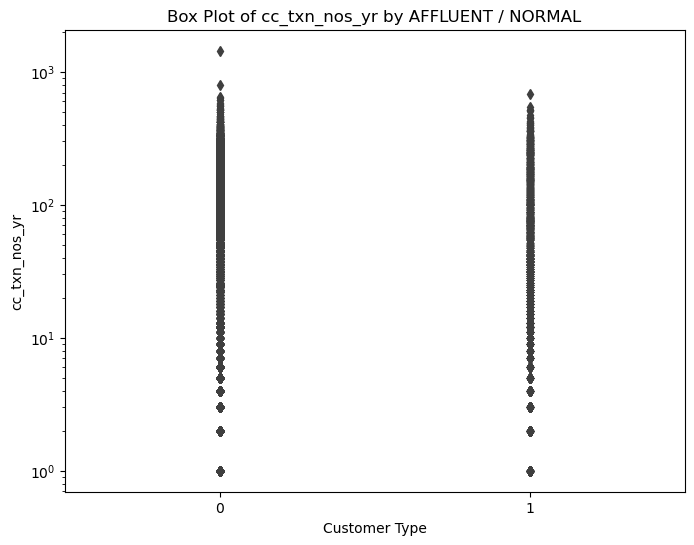

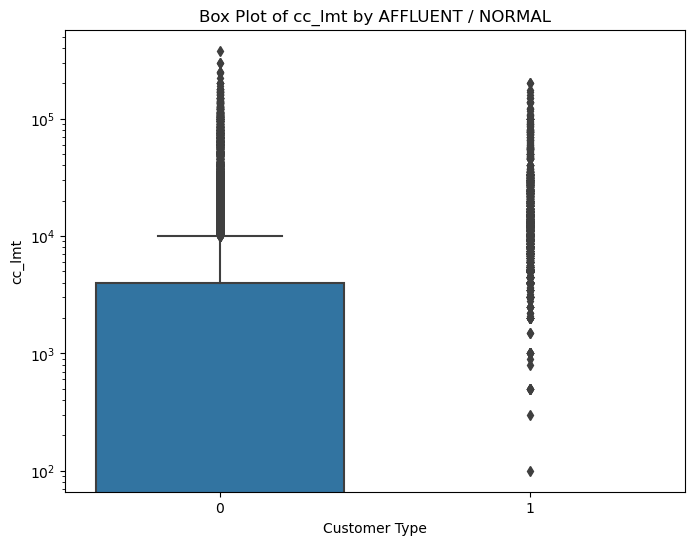

In [35]:
for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    boxplot = sns.boxplot(x='c_seg_encoded', y=feature, data=df_l2)
    plt.title(f'Box Plot of {feature} by AFFLUENT / NORMAL')

    # Add condition to use log scale if values are greater than 1000
    if df_l2[feature].max() > 1000:
        boxplot.set_yscale('log')
    
    plt.xlabel('Customer Type')
    plt.ylabel(feature)
    plt.show()